# Esta sección será para el análisis de Precios


Consistencia en columna de Precios, Metros^2

'price',
'currency',
'price_aprox_local_currency',
'price_aprox_usd', 
'surface_total_in_m2',
'surface_covered_in_m2', 
'price_usd_per_m2', 
'price_per_m2', 


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('properatti.csv')

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 no

In [4]:
df[(df['price_per_m2'].notnull())].count()

Unnamed: 0                    87658
operation                     87658
property_type                 87658
place_name                    87635
place_with_parent_names       87658
country_name                  87658
state_name                    87658
geonames_id                   72508
lat-lon                       51136
lat                           51136
lon                           51136
price                         87658
currency                      87658
price_aprox_local_currency    87658
price_aprox_usd               87658
surface_total_in_m2           63350
surface_covered_in_m2         87658
price_usd_per_m2              63350
price_per_m2                  87658
floor                          6457
rooms                         36135
expenses                      12073
properati_url                 87658
description                   87657
title                         87658
image_thumbnail               86016
dtype: int64

In [5]:
df[['price',
'currency',
'price_aprox_local_currency',
'price_aprox_usd', 
'surface_total_in_m2',
'surface_covered_in_m2', 
'price_usd_per_m2', 
'price_per_m2']].sample(10)

,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
70079,245000.0,USD,4322902.50,245000.00,150.0,130.0,1633.333333,1884.615385
37036,120000.0,USD,2117340.00,120000.00,120.0,NaN,1000.000000,NaN
36900,340000.0,USD,5999130.00,340000.00,270.0,250.0,1259.259259,1360.000000
100605,NaN,NaN,NaN,NaN,10000.0,100.0,NaN,NaN
39490,90000.0,USD,1588005.00,90000.00,380.0,60.0,236.842105,1500.000000
108791,165000.0,USD,2911342.50,165000.00,NaN,52.0,NaN,3173.076923
3865,NaN,NaN,NaN,NaN,36.0,33.0,NaN,NaN
76107,197172.0,USD,3479001.35,197172.00,49.0,46.0,4023.918367,4286.347826
66229,830000.0,ARS,821341.77,46549.45,NaN,40.0,NaN,20750.000000
65773,135000.0,USD,2382007.50,135000.00,86.0,60.0,1569.767442,2250.000000


Identificar cuales son los casos donde hay diferencias

In [6]:
# busco para la moneda USD, inconsistencias entre el precio y precio aproximado en USD
df.loc[(df['currency'] == 'USD') & (df['price'] != df['price_aprox_usd'])  ]

# no hay casos de diferencia

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail


Calculo el precio del USD, basado en casas expresadas en USD


In [7]:
serie_local = df.loc[(df['currency'] == 'USD')]['price_aprox_local_currency'] # / ['price']
serie_precio = df.loc[(df['currency'] == 'USD')]['price_aprox_usd']

x = serie_local / serie_precio

usd_rate = round(x.mean(),4)
print(usd_rate)

17.6445


Calculo el precio del USD, basado en casas expresadas en ARS

In [8]:
serie_local = df.loc[(df['currency'] == 'ARS')]['price_aprox_local_currency'] # / ['price']
serie_precio = df.loc[(df['currency'] == 'ARS')]['price_aprox_usd']

x = serie_local / serie_precio

usd_rate = round(x.mean(),4)
print(usd_rate)

17.6445


En las sentencias anteriores se valida que el precio del USD es el mismo, el cual se tomará de referencia

In [9]:
# busco para la moneda ARS, inconsistencias entre el precio y precio aproximado en moneda local
df.loc[(df['currency'] == 'ARS') & (df['price'] != df['price_aprox_local_currency']), ('price',
'currency',
'price_aprox_local_currency',
'price_aprox_usd', 
'surface_total_in_m2',
'surface_covered_in_m2', 
'price_usd_per_m2', 
'price_per_m2')].head(10)


,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
9,460000.0,ARS,455201.45,25798.49,NaN,NaN,NaN,NaN
32,550000.0,ARS,544262.59,30846.02,50.0,50.0,616.920400,11000.000000
37,1250000.0,ARS,1236960.43,70104.59,75.0,75.0,934.727867,16666.666667
78,5500000.0,ARS,5442626.35,308460.22,261.0,18615.0,1181.839923,295.460650
97,1423800.0,ARS,1408947.37,79851.93,NaN,NaN,NaN,NaN
99,850000.0,ARS,841133.07,47671.12,200.0,180.0,238.355600,4722.222222
122,2600000.0,ARS,2572877.76,145817.55,344.0,188.0,423.888227,13829.787234
128,1250000.0,ARS,1236960.43,70104.59,129.0,66.0,543.446434,18939.393939
130,1111111.0,ARS,1099520.36,62315.19,328.0,222.0,189.985335,5005.004505
154,1200000.0,ARS,1187482.08,67300.41,NaN,40.0,NaN,30000.000000


Se expresarán todos los precios a USD, eliminando la moneda ARS

In [10]:
def roundBy(x, base=100):
    return int(base * round(float(x)/base))

In [11]:
print(roundBy(4543.233243,1000))

5000


In [12]:
df.loc[(df['currency'] == 'ARS'),'price'] = df.loc[(df['currency'] == 'ARS')]['price_aprox_usd'].apply(roundBy)

In [13]:
df.loc[(df['currency'] == 'ARS') & (df['price'] != df['price_aprox_local_currency']), ('price',
'currency',
'price_aprox_local_currency',
'price_aprox_usd', 
'surface_total_in_m2',
'surface_covered_in_m2', 
'price_usd_per_m2', 
'price_per_m2')].head(5)

,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
9,25800.0,ARS,455201.45,25798.49,NaN,NaN,NaN,NaN
32,30800.0,ARS,544262.59,30846.02,50.0,50.0,616.920400,11000.000000
37,70100.0,ARS,1236960.43,70104.59,75.0,75.0,934.727867,16666.666667
78,308500.0,ARS,5442626.35,308460.22,261.0,18615.0,1181.839923,295.460650
97,79900.0,ARS,1408947.37,79851.93,NaN,NaN,NaN,NaN


In [14]:
print(usd_rate)

17.6445


In [15]:
# llevo todas los precios a USD
df.loc[(df['currency'] == 'ARS') & (df['price_per_m2'].notnull()),'price_per_m2'] = df['price_per_m2']/usd_rate

In [16]:
## Moneda ARS, ya convertido en pasos anteriores a USD

# Redondear en múltiplos base 10 - precio por m2
aux_redondeo = df.loc[(df['currency'] == 'ARS') & (df['price_per_m2'].notnull()) ,'price_per_m2' ].apply(lambda r: roundBy(r,10))
df.loc[(df['currency'] == 'ARS'),'price_per_m2'] = aux_redondeo

# Redondear en múltiplos base 10 - precio USD por m2
aux_redondeo = df.loc[(df['currency'] == 'ARS') & (df['price_usd_per_m2'].notnull()) ,'price_usd_per_m2' ].apply(lambda r: roundBy(r,10))
df.loc[(df['currency'] == 'ARS'),'price_usd_per_m2'] = aux_redondeo


## Moneda USD

# Redondear en múltiplos base 10 - precio por m2
aux_redondeo = df.loc[(df['currency'] == 'USD') & (df['price_per_m2'].notnull()) ,'price_per_m2' ].apply(lambda r: roundBy(r,10))
df.loc[(df['currency'] == 'USD'),'price_per_m2'] = aux_redondeo

# Redondear en múltiplos base 10 - precio USD por m2
aux_redondeo = df.loc[(df['currency'] == 'USD') & (df['price_usd_per_m2'].notnull()) ,'price_usd_per_m2' ].apply(lambda r: roundBy(r,10))
df.loc[(df['currency'] == 'USD'),'price_usd_per_m2'] = aux_redondeo

In [17]:
df.loc[(df['currency'] == 'ARS') ,('price_usd_per_m2','price_per_m2') ].sample(5)


,price_usd_per_m2,price_per_m2
30314,210.0,2430.0
91566,1440.0,NaN
105534,1320.0,1340.0
100873,1540.0,1900.0
50345,1080.0,1420.0


In [18]:
df.loc[(df['currency'] == 'USD') & (df['price_per_m2'].notnull()),('price_per_m2','price_usd_per_m2')].head()

,price_per_m2,price_usd_per_m2
0,1550.0,1130.0
2,1310.0,1310.0
4,1830.0,1830.0
6,1670.0,1230.0
7,3450.0,3070.0


In [19]:
df.loc[(df['currency'] == 'ARS'),('price',
'currency',
'price_aprox_local_currency',
'price_aprox_usd', 
'surface_total_in_m2',
'surface_covered_in_m2', 
'price_usd_per_m2', 
'price_per_m2')].head(5)


,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
9,25800.0,ARS,455201.45,25798.49,NaN,NaN,NaN,NaN
32,30800.0,ARS,544262.59,30846.02,50.0,50.0,620.0,620.0
37,70100.0,ARS,1236960.43,70104.59,75.0,75.0,930.0,940.0
78,308500.0,ARS,5442626.35,308460.22,261.0,18615.0,1180.0,20.0
97,79900.0,ARS,1408947.37,79851.93,NaN,NaN,NaN,NaN


In [20]:
# Actualizo la moneda a USD
#df.loc[(df['currency'] == 'ARS'),'currency'] = 'USD'

# Se completan datos de precios

In [21]:
df.loc[ (df['price'].isnull()) & (df['price_per_m2'].notnull())]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail


In [22]:
df.loc[ (df['price'].isnull()) & (df['price_usd_per_m2'].notnull())]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail


In [23]:
df.loc[ (df['price'].isnull())].sample(5) #.count() # (10)
# hay 20410 casos de publicaciones sin precio

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
33807,33807,sell,house,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|La ...,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.929079,-57.929728",-34.929079,...,NaN,NaN,NaN,NaN,10.0,NaN,http://www.properati.com.ar/18ant_venta_casa_l...,Corredor Responsable: Pablo Di Girolamo - CDCP...,Casa de 4 dormitorios en La Plata,https://thumbs4.properati.com/0/Uqt0dm6hYjdzlY...
43622,43622,sell,apartment,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,3429760.0,"-34.6026210169,-58.363721946",-34.602621,...,77.0,NaN,NaN,NaN,2.0,NaN,http://www.properati.com.ar/18yt0_venta_depart...,"Departamento 2 ambientes,en Puerto Madero con ...",Departamento 2 ambientes Venta Puerto Madero,https://thumbs4.properati.com/4/cg1aJ9CEgkDWVg...
65414,65414,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1acas_venta_depart...,Departamento a estrenar contrafrente de un dor...,Departamento - General Paz,https://thumbs4.properati.com/9/eMSxdMVnvT3cMQ...
39561,39561,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-32.4182596,-63.2515735",-32.418260,...,NaN,NaN,NaN,2.0,2.0,NaN,http://www.properati.com.ar/18okz_venta_depart...,OPERACION: VENTA TIPO DE PROPIEDAD: DEPARTAMEN...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/1/YsN6gaz_bOiV4Y...
102566,102566,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,NaN,NaN,...,114.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1bqrj_venta_depart...,"Características: Doble ingreso, living comedor...",Departamento en Norte,https://thumbs4.properati.com/6/GtTcDmnjel8zn1...


Aplico rejec en búsqueda de obtener precios

In [24]:
import re
pattern = r'([Uu][$][Dd][\s])(\d{1,3}[.]\d{3,3})'
regex = re.compile(pattern)

In [25]:
regex.findall('U$D 98.000 - Departamento en Venta - Independencia     300')

[('U$D ', '98.000')]

In [26]:
array_precios = df.loc[ (df['price'].isnull()),'title'].apply(regex.findall)

In [27]:
array_precios[3054] #.asType(float)

[('U$D ', '135.000')]

In [28]:
def retValue(s):    
    r = s.copy()
    for i in s.index:
        flag = True
        for idx, val in enumerate(s[i]):
            r[i] = float(val[1])*1000
            flag = False
        if flag:
            r[i] = np.nan
    return r

array_precios = retValue(array_precios)
#array_precios[3054][0][1]
#array_precios.index
#array_precios[1] #= float(array_precios[:][0][1])*1000

In [29]:
array_precios[3054] #.asType(float)

135000.0

In [30]:
 df.loc[ (df['price'].isnull()),'price'] = array_precios

In [31]:
df.loc[ (df['price'].isnull())].count()


Unnamed: 0                    18004
operation                     18004
property_type                 18004
place_name                    18004
place_with_parent_names       18004
country_name                  18004
state_name                    18004
geonames_id                   17036
lat-lon                        8840
lat                            8840
lon                            8840
price                             0
currency                          0
price_aprox_local_currency        0
price_aprox_usd                   0
surface_total_in_m2           10939
surface_covered_in_m2         11312
price_usd_per_m2                  0
price_per_m2                      0
floor                           913
rooms                          5566
expenses                       1016
properati_url                 18004
description                   18004
title                         18004
image_thumbnail               17142
dtype: int64

In [32]:
#obtengo precios de propiedades utilizando 'USD XXX.XXXX' en el patrón a buscar
pattern = r'([Uu][Ss][Dd][\s])(\d{1,3}[.]\d{3,3})'
regex = re.compile(pattern)

In [33]:
array_precios = df.loc[ (df['price'].isnull()),'description'].apply(regex.findall)

In [34]:
array_precios = retValue(array_precios)

In [35]:
for i, value in enumerate(array_precios):
    if value > 0:
        print(i,value)

1053 17500.0
4124 150000.0
6962 15000.0
6963 15000.0
6964 15000.0
7005 63000.0
8784 7200.0
16057 15000.0
16464 45000.0
17739 40000.0
17740 40000.0
17756 30000.0


In [36]:
 df.loc[ (df['price'].isnull()),'price'] = array_precios

In [37]:
array_precios[120787] 

30000.0

In [38]:
df.loc[ (df['price'].isnull()) & (df['precios'].notnull())]  #= array_precios

KeyError: 'precios'

Completo datos de precios por m2 (precio dividido superficie cubierta) o precios USD por m2 (que es el precio dividido la superficie total) 

In [39]:
# Selecciono los casos de PRECIO existente, PRECIO x M2 sin datos, SUPERFICIE CUBIERTA con datos y mayor a cero (0), y 
# SUPERFICIE TOTAL mayor o igual a SUPERFICIE CUBIERTA
# Resultado son 2031 casos que se puede actualizar

df.loc[(df['price'].notnull()) & (df['price_per_m2'].isnull())  & (df['surface_covered_in_m2'] > 0) & (df['surface_covered_in_m2'].notnull()) & (df['surface_total_in_m2'] >= df['surface_covered_in_m2']) ]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
1666,1666,sell,house,Ituzaingó,|Argentina|Bs.As. G.B.A. Zona Oeste|Ituzaingó|,Argentina,Bs.As. G.B.A. Zona Oeste,3433359.0,"-34.66341019,-58.67405701",-34.663410,...,80.0,NaN,NaN,NaN,2.0,NaN,http://www.properati.com.ar/15j8w_venta_casa_i...,CONSULTE POR EL CÓDIGO:1834(2)DUPLEX A ESTRENA...,U$D 115.000 - Tipo casa PH en Venta -,https://thumbs4.properati.com/4/uWjbZ69MtmAB81...
1667,1667,sell,house,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,...,373.0,NaN,NaN,NaN,4.0,NaN,http://www.properati.com.ar/15j8x_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - Casa en Venta - El Golf,https://thumbs4.properati.com/0/B5XXxSBOmFrPd9...
1668,1668,sell,house,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,...,373.0,NaN,NaN,NaN,4.0,NaN,http://www.properati.com.ar/15j8y_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - Casa en Venta - El Golf,https://thumbs4.properati.com/1/xyHZp-kLegQMHO...
1669,1669,sell,house,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,...,350.0,NaN,NaN,NaN,4.0,NaN,http://www.properati.com.ar/15j8z_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - Casa en Venta - El Golf,https://thumbs4.properati.com/7/P1fnUddau9ItxR...
1670,1670,sell,house,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,...,373.0,NaN,NaN,NaN,4.0,NaN,http://www.properati.com.ar/15j90_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - Casa en Venta - El Golf,https://thumbs4.properati.com/3/S7E92ARTrGAxe4...
1671,1671,sell,house,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,...,373.0,NaN,NaN,NaN,4.0,NaN,http://www.properati.com.ar/15j91_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - Casa en Venta - El Golf,https://thumbs4.properati.com/5/LPErF579G9cVxQ...
1672,1672,sell,house,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,...,373.0,NaN,NaN,NaN,4.0,NaN,http://www.properati.com.ar/15j92_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - Casa en Venta - El Golf,https://thumbs4.properati.com/5/S3_5VKYGHqhuZu...
1673,1673,sell,house,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,...,373.0,NaN,NaN,NaN,4.0,NaN,http://www.properati.com.ar/15j93_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - Casa en Venta - El Golf,https://thumbs4.properati.com/7/gS5ssLHlmIRvka...
1674,1674,sell,house,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,...,373.0,NaN,NaN,NaN,4.0,NaN,http://www.properati.com.ar/15j94_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - Casa en Venta - El Golf,https://thumbs4.properati.com/3/T0Cs38C0nSSl2l...
1675,1675,sell,house,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,...,373.0,NaN,NaN,NaN,4.0,NaN,http://www.properati.com.ar/15j95_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - Casa en Venta - El Golf,https://thumbs4.properati.com/6/_jcUbLv-Zt-

In [40]:
#Extraigo el precio de los casos anteriores y la cantidad de m2 CUBIERTA para calcular precio por m2
a_price = df.loc[(df['price'].notnull()) & (df['price_per_m2'].isnull()) & (df['surface_covered_in_m2'].notnull()) & (df['surface_covered_in_m2'] > 0) & (df['surface_total_in_m2'] >= df['surface_covered_in_m2']),'price' ]
a_scxm2 = df.loc[(df['price'].notnull()) & (df['price_per_m2'].isnull()) & (df['surface_covered_in_m2'].notnull()) & (df['surface_covered_in_m2'] > 0)& (df['surface_total_in_m2'] >= df['surface_covered_in_m2']),'surface_covered_in_m2' ]
a_pcxm2 = a_price / a_scxm2

In [41]:
# Aplico el Precio por m2 CUBIERTO al dataset
df.loc[(df['price'].notnull()) & (df['price_per_m2'].isnull())  & (df['surface_covered_in_m2'] > 0) & (df['surface_covered_in_m2'].notnull()) & (df['surface_total_in_m2'] >= df['surface_covered_in_m2']),'price_per_m2' ]= a_pcxm2

In [42]:
#Extraigo el precio de los casos anteriores y la cantidad de m2 TOTAL para calcular precio por m2
a_price = df.loc[(df['price'].notnull()) & (df['price_usd_per_m2'].isnull()) & (df['surface_total_in_m2'].notnull()) & (df['surface_total_in_m2'] > 0) & (df['surface_total_in_m2'] >= df['surface_covered_in_m2']),'price' ]
a_stxm2 = df.loc[(df['price'].notnull()) & (df['price_usd_per_m2'].isnull()) & (df['surface_total_in_m2'].notnull()) & (df['surface_total_in_m2'] > 0) & (df['surface_total_in_m2'] >= df['surface_covered_in_m2']),'surface_total_in_m2' ]
a_ptxm2 = a_price / a_stxm2

In [43]:
# Aplico el Precio por m2 TOTAL al dataset
df.loc[(df['price'].notnull()) & (df['price_usd_per_m2'].isnull())  & (df['surface_total_in_m2'] > 0) & (df['surface_covered_in_m2'].notnull()) & (df['surface_total_in_m2'] >= df['surface_covered_in_m2']),'price_usd_per_m2' ]= a_ptxm2

En la consulta siguiente tenemos 89.689 registros con precio y precio por m2

In [44]:
df.loc[ (df['price'].notnull()) & (df['price_per_m2'].notnull())].count()

Unnamed: 0                    89689
operation                     89689
property_type                 89689
place_name                    89666
place_with_parent_names       89689
country_name                  89689
state_name                    89689
geonames_id                   73848
lat-lon                       53068
lat                           53068
lon                           53068
price                         89689
currency                      87658
price_aprox_local_currency    87658
price_aprox_usd               87658
surface_total_in_m2           65381
surface_covered_in_m2         89689
price_usd_per_m2              65381
price_per_m2                  89689
floor                          6524
rooms                         38057
expenses                      12073
properati_url                 89689
description                   89688
title                         89689
image_thumbnail               88047
dtype: int64

En la consulta siguiente consultamos propiedades con PRECIO, PRECIO x M2 (solo metros cubiertos) y PRECIO USD X M2 (incluye los metros totales), hay un total de 65.381 registros

In [45]:
df.loc[ (df['price'].notnull()) & (df['price_per_m2'].notnull()) & (df['price_usd_per_m2'].notnull())].count()

Unnamed: 0                    65381
operation                     65381
property_type                 65381
place_name                    65363
place_with_parent_names       65381
country_name                  65381
state_name                    65381
geonames_id                   53647
lat-lon                       38968
lat                           38968
lon                           38968
price                         65381
currency                      63350
price_aprox_local_currency    63350
price_aprox_usd               63350
surface_total_in_m2           65381
surface_covered_in_m2         65381
price_usd_per_m2              65381
price_per_m2                  65381
floor                          3103
rooms                         25571
expenses                      10266
properati_url                 65381
description                   65381
title                         65381
image_thumbnail               64524
dtype: int64

# Elimino registros que no tengan precio

In [46]:
# Elimino los registros que NO TENGAN PRECIO
df = df.drop(df.loc[df['price'].isnull()].index)

In [47]:
#Elimino los registros que NO TENGAN PRECIO POR M2
df = df.drop(df.loc[df['price_per_m2'].isnull()].index)

In [48]:
#Antes de hacer la consulta se que debo tener 89.689 registros
df.count()

Unnamed: 0                    89689
operation                     89689
property_type                 89689
place_name                    89666
place_with_parent_names       89689
country_name                  89689
state_name                    89689
geonames_id                   73848
lat-lon                       53068
lat                           53068
lon                           53068
price                         89689
currency                      87658
price_aprox_local_currency    87658
price_aprox_usd               87658
surface_total_in_m2           65381
surface_covered_in_m2         89689
price_usd_per_m2              65381
price_per_m2                  89689
floor                          6524
rooms                         38057
expenses                      12073
properati_url                 89689
description                   89688
title                         89689
image_thumbnail               88047
dtype: int64

# Definición de Cuartiles

In [49]:
df.sample(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
62868,62868,sell,house,Escobar,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|,Argentina,Bs.As. G.B.A. Zona Norte,3434130.0,"-34.3608758,-58.7512417",-34.360876,...,180.0,460,1780,NaN,NaN,NaN,http://www.properati.com.ar/1a7tg_venta_casa_e...,CASA A LA LAGUNA Bº Cº SAN MATIAS-ESCOBARCasa...,CASA A LA LAGUNA Bº Cº SAN MATIAS-ESCOBAR,https://thumbs4.properati.com/9/OXbAwT2rBQZq-5...
25977,25977,sell,house,Canning,|Argentina|Bs.As. G.B.A. Zona Sur|Ezeiza|Canning|,Argentina,Bs.As. G.B.A. Zona Sur,3435719.0,"-34.8499607,-58.5117573",-34.849961,...,60.0,1170,1170,NaN,3.0,NaN,http://www.properati.com.ar/17qma_venta_casa_e...,DUPLEX DE 60 M2 EN COMPLEJO PETIT CASUARINAS...,Duplex en Petit Casuarinas 3!,https://thumbs4.properati.com/0/utED_22crjsk7Y...
101371,101371,sell,apartment,Lanús,|Argentina|Bs.As. G.B.A. Zona Sur|Lanús|Lanús|,Argentina,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,...,45.0,NaN,1670,NaN,NaN,NaN,http://www.properati.com.ar/1bpa5_venta_depart...,"Dpto 2 amb de 45 mts en forma ""Pasante"".- Ingr...",Departamento - Lanús Este,NaN
57480,57480,sell,house,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.4117297,-64.2008948",-31.411730,...,20.0,NaN,11000,NaN,9.0,NaN,http://www.properati.com.ar/19tgq_venta_casa_c...,Corredor Responsable: DANIELA E. CASTRO - CPCP...,TERRENO APTO CREDITO / EDIFICIO FOS 80% ALBERDI,https://thumbs4.properati.com/0/7pgeDw8I7g9I1y...
90147,90147,sell,apartment,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,...,50.0,2340,2760,NaN,NaN,1800.0,http://www.properati.com.ar/1b9ps_venta_depart...,A 3 cuadras de la estación del ferrocarril Mit...,Jardín Central - Departamento en Venta,https://thumbs4.properati.com/4/xcZikDGKvoWZF6...


In [50]:
df.loc[(df['property_type']=='apartment') & (df['place_name']=='Abasto') & (df['state_name']=='Capital Federal')]

#df['property_type']=='apartment'

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
791,791,sell,apartment,Abasto,|Argentina|Capital Federal|Abasto|,Argentina,Capital Federal,NaN,"-34.6077076,-58.4119182",-34.607708,...,52.0,1900,1900,NaN,3.0,550.0,http://www.properati.com.ar/15g01_venta_depart...,"Venta de Departamento 3 AMBIENTES en Abasto, C...",DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/6/ciQN2XSKOSaUjr...
5356,5356,sell,apartment,Abasto,|Argentina|Capital Federal|Abasto|,Argentina,Capital Federal,NaN,"-34.6065692,-58.4111367",-34.606569,...,63.0,1000,2540,1.0,4.0,NaN,http://www.properati.com.ar/15pyq_venta_depart...,"4 AMBIENTES CON PATIO Y TERRAZA AL FRENTE, EN ...",DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/2/sTRi-vxscn55tw...
5395,5395,sell,apartment,Abasto,|Argentina|Capital Federal|Abasto|,Argentina,Capital Federal,NaN,"-34.6049797,-58.4134452",-34.604980,...,76.0,1710,1780,NaN,3.0,2500.0,http://www.properati.com.ar/15q3l_venta_depart...,Venta de Departamento 3 AMBIENTES en AbastoSem...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/1/9cVAQwMugc_uH-...
5493,5493,sell,apartment,Abasto,|Argentina|Capital Federal|Abasto|,Argentina,Capital Federal,NaN,"-34.6014214948,-58.4104993214",-34.601421,...,28.0,2140,2140,NaN,1.0,NaN,http://www.properati.com.ar/15qka_venta_depart...,En esta ocasión pasamos a ofrecerles departame...,En Venta - 1 Ambiente - Abasto,https://thumbs4.properati.com/5/lwx7HlJZy8bcF9...
12842,12842,sell,apartment,Abasto,|Argentina|Capital Federal|Abasto|,Argentina,Capital Federal,NaN,"-34.606269,-58.409813",-34.606269,...,35.0,NaN,1990,NaN,2.0,NaN,http://www.properati.com.ar/16n4o_venta_depart...,Corredor Responsable: Ariel Champanier - C.U.C...,APTO CREDITO-,https://thumbs4.properati.com/9/QDbzAIFaiQmuUk...
17996,17996,sell,apartment,Abasto,|Argentina|Capital Federal|Abasto|,Argentina,Capital Federal,NaN,"-34.6063725,-58.4124011",-34.606372,...,41.0,1560,1630,NaN,1.0,971.0,http://www.properati.com.ar/174qj_venta_depart...,"Monoambiente en tres niveles con entrepiso, a ...",DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/7/2QlIlhgNo87wPA...
19603,19603,sell,apartment,Abasto,|Argentina|Capital Federal|Abasto|,Argentina,Capital Federal,NaN,"-34.6025951,-58.4072804",-34.602595,...,95.0,2640,2890,3.0,NaN,NaN,http://www.properati.com.ar/17a81_venta_depart...,"Venta de Departamento 4 AMBIENTES en Abasto, C...",DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/0/in1GoapW_Lkdbs...
19604,19604,sell,apartment,Abasto,|Argentina|Capital Federal|Abasto|,Argentina,Capital Federal,NaN,"-34.6025951,-58.4072804",-34.602595,...,164.0,2010,2680,3.0,NaN,NaN,http://www.properati.com.ar/17a82_venta_depart...,"Venta de Departamento 5 AMBIENTES en Abasto, C...",DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/2/VvVEN01H3GMUQo...
20373,20373,sell,apartment,Abasto,|Argentina|Capital Federal|Abasto|,Argentina,Capital Federal,NaN,"-34.602358,-58.413581",-34.602358,...,104.0,2350,2350,NaN,5.0,NaN,http://www.properati.com.ar/17ceo_venta_depart...,"Excelente departamento en semipiso al frente, ...",Luminoso y Amplio Semipiso en el Abasto / Almagro,https://thumbs4.properati.com/1/JRQ2m9-IsnwOlb...
20634,20634,sell,apartment,Abasto,|Argentina|Capital Federal|Abasto|,Argentina,Capital Federal,NaN,"-34.6036497,-58.4116124",-34.603650,...,53.0,2860,3020,NaN,2.0,1390.0,http://www.properati.com.ar/17d7g_venta_depart...,VENTA DEPARTAMENTO 2 AMBIENTES CON ESPACIO DE ...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/3/zMfNPVxUr6yJOB...


In [51]:
aux = df.groupby(['property_type','place_name','state_name'])['price_per_m2'].quantile(0.05) #.columns('uno','dos')

In [71]:
aux

property_type  place_name                    state_name                  
PH             Abasto                        Capital Federal                  2540.0
               Acassuso                      Bs.As. G.B.A. Zona Norte         3290.0
               Adrogué                       Bs.As. G.B.A. Zona Sur           2679.0
               Agronomía                     Capital Federal                 11609.0
               Aguas Verdes                  Buenos Aires Costa Atlántica     1000.0
               Almagro                       Capital Federal                  3159.0
               Almirante Brown               Bs.As. G.B.A. Zona Sur           1090.0
               Avellaneda                    Bs.As. G.B.A. Zona Sur           5875.0
               Bahía Blanca                  Buenos Aires Interior            1772.5
               Balcarce                      Buenos Aires Interior             970.0
               Balvanera                     Capital Federal                

In [52]:
dfqinf = pd.DataFrame(aux)
dfqinf.columns = ['qinf']

In [53]:
dfqinf.head(5)

qinf
property_type place_name   state_name                          
PH            Abasto       Capital Federal               1384.0
              Acassuso     Bs.As. G.B.A. Zona Norte      1353.0
              Adrogué      Bs.As. G.B.A. Zona Sur        1403.0
              Agronomía    Capital Federal               1458.0
              Aguas Verdes Buenos Aires Costa Atlántica  1000.0

In [54]:
dfqinf.loc['PH'].loc['Abasto'].loc['Capital Federal']
#dfq05

qinf    1384.0
Name: Capital Federal, dtype: float64

In [55]:
type(dfqinf)

pandas.core.frame.DataFrame

In [56]:
a = 0
for i in dfqinf.index.levels:
    a +=1
    print (i)
    print (a)

Index(['PH', 'apartment', 'house', 'store'], dtype='object', name='property_type')
1
Index([' Country Maschwitz Club', ' los alamos', '9 de Abril', 'Abasto',
       'Abril Club de Campo', 'Acacias Blancas', 'Acassuso', 'Achiras',
       'Adrogué', 'Aeropuerto Internacional Ezeiza',
       ...
       'Villars', 'Virasoro Village', 'Virrey del Pino', 'Virreyes', 'Wilde',
       'William Morris', 'Yerba Buena', 'Zelaya', 'Zárate',
       'coordenadas 34.255511'],
      dtype='object', name='place_name', length=923)
2
Index(['Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste',
       'Bs.As. G.B.A. Zona Sur', 'Buenos Aires Costa Atlántica',
       'Buenos Aires Interior', 'Capital Federal', 'Catamarca', 'Chaco',
       'Chubut', 'Corrientes', 'Córdoba', 'Entre Ríos', 'Jujuy', 'La Pampa',
       'La Rioja', 'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta',
       'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago Del Estero',
       'Tierra Del Fuego', 'Tucumán'],
      dt

In [57]:
for i in dfqinf.index:
    print (i);

('PH', 'Abasto', 'Capital Federal')
('PH', 'Acassuso', 'Bs.As. G.B.A. Zona Norte')
('PH', 'Adrogué', 'Bs.As. G.B.A. Zona Sur')
('PH', 'Agronomía', 'Capital Federal')
('PH', 'Aguas Verdes', 'Buenos Aires Costa Atlántica')
('PH', 'Almagro', 'Capital Federal')
('PH', 'Almirante Brown', 'Bs.As. G.B.A. Zona Sur')
('PH', 'Avellaneda', 'Bs.As. G.B.A. Zona Sur')
('PH', 'Bahía Blanca', 'Buenos Aires Interior')
('PH', 'Balcarce', 'Buenos Aires Interior')
('PH', 'Balvanera', 'Capital Federal')
('PH', 'Banfield', 'Bs.As. G.B.A. Zona Sur')
('PH', 'Barracas', 'Capital Federal')
('PH', 'Barrio Fortunato de La Plaza', 'Buenos Aires Costa Atlántica')
('PH', 'Barrio La Perla Norte', 'Buenos Aires Costa Atlántica')
('PH', 'Barrio Norte', 'Capital Federal')
('PH', 'Barrio San Juan', 'Buenos Aires Costa Atlántica')
('PH', 'Barrio Santa Teresa', 'Bs.As. G.B.A. Zona Norte')
('PH', 'Batán', 'Buenos Aires Interior')
('PH', 'Beccar', 'Bs.As. G.B.A. Zona Norte')
('PH', 'Belgrano', 'Capital Federal')
('PH', 'Bell

('house', 'Francisco Alvarez', 'Bs.As. G.B.A. Zona Oeste')
('house', 'Fray Luis Beltrán', 'Santa Fe')
('house', 'Funes', 'Santa Fe')
('house', 'Fátima', 'Bs.As. G.B.A. Zona Norte')
('house', 'Galapagos Country Club', 'Bs.As. G.B.A. Zona Norte')
('house', 'Garupá', 'Misiones')
('house', 'Garín', 'Bs.As. G.B.A. Zona Norte')
('house', 'General Alvear', 'Buenos Aires Interior')
('house', 'General Cabrera', 'Córdoba')
('house', 'General Fernández Oro', 'Río Negro')
('house', 'General Las Heras', 'Buenos Aires Interior')
('house', 'General Madariaga', 'Buenos Aires Interior')
('house', 'General Pacheco', 'Bs.As. G.B.A. Zona Norte')
('house', 'General Pico', 'La Pampa')
('house', 'General Pinto', 'Buenos Aires Interior')
('house', 'General Pueyrredón', 'Buenos Aires Interior')
('house', 'General Roca', 'Río Negro')
('house', 'General Rodríguez', 'Bs.As. G.B.A. Zona Oeste')
('house', 'General San Martín', 'Bs.As. G.B.A. Zona Norte')
('house', 'Gerli', 'Bs.As. G.B.A. Zona Sur')
('house', 'Glew'

('house', 'Villa Luro', 'Capital Federal')
('house', 'Villa Luzuriaga', 'Bs.As. G.B.A. Zona Oeste')
('house', 'Villa Lynch', 'Bs.As. G.B.A. Zona Norte')
('house', 'Villa Madero', 'Bs.As. G.B.A. Zona Oeste')
('house', 'Villa Maipu', 'Bs.As. G.B.A. Zona Norte')
('house', 'Villa Martelli', 'Bs.As. G.B.A. Zona Norte')
('house', 'Villa María', 'Córdoba')
('house', 'Villa Mercedes', 'San Juan')
('house', 'Villa Monteagudo', 'Bs.As. G.B.A. Zona Norte')
('house', 'Villa Nueva', 'Mendoza')
('house', 'Villa Ortuzar', 'Capital Federal')
('house', 'Villa Pacheco', 'Bs.As. G.B.A. Zona Norte')
('house', 'Villa Paranacito', 'Entre Ríos')
('house', 'Villa Parque Santa Ana', 'Córdoba')
('house', 'Villa Parque Siquiman', 'Córdoba')
('house', 'Villa Primera', 'Buenos Aires Costa Atlántica')
('house', 'Villa Pueyrredón', 'Capital Federal')
('house', 'Villa Raffo', 'Bs.As. G.B.A. Zona Oeste')
('house', 'Villa Real', 'Capital Federal')
('house', 'Villa Riachuelo', 'Capital Federal')
('house', 'Villa Rosa', 

In [58]:
#### NO LLEGO A FUNCIONAR ####
df.loc[(df['property_type']=='apartment') & (df['place_name']=='Abasto') & (df['state_name']=='Capital Federal')]

df['NewCol'] = df.apply(lambda x: segmentMatch(x['TimeCol'], x['ResponseCol']), axis=1)

def marcaOutlier(pt, pn, sn, pr):
    return (dfq05.loc[pt].loc[pn].loc[st] < pr) 

NameError: ("name 'segmentMatch' is not defined", 'occurred at index 0')

In [ ]:
def marcaOutlier(pt, pn, sn, pr):
    return (dfq05.loc[pt].loc[pn].loc[sn] < pr) 

In [59]:
df['outlier'] = df.apply(lambda x: marcaOutlier(df['property_type'], df['place_name'], df['state_name'], df['price']))

NameError: ("name 'marcaOutlier' is not defined", 'occurred at index Unnamed: 0')

In [60]:
aux = df.groupby(['property_type','place_name','state_name'])['price_per_m2'].quantile(0.95)

dfqsup = pd.DataFrame(aux)

In [61]:
dfqsup.columns = ['qsup']
dfqsup.head()

qsup
property_type place_name   state_name                           
PH            Abasto       Capital Federal                2540.0
              Acassuso     Bs.As. G.B.A. Zona Norte       3290.0
              Adrogué      Bs.As. G.B.A. Zona Sur         2679.0
              Agronomía    Capital Federal               11609.0
              Aguas Verdes Buenos Aires Costa Atlántica   1000.0

In [62]:
dfqinf.head()

qinf
property_type place_name   state_name                          
PH            Abasto       Capital Federal               1384.0
              Acassuso     Bs.As. G.B.A. Zona Norte      1353.0
              Adrogué      Bs.As. G.B.A. Zona Sur        1403.0
              Agronomía    Capital Federal               1458.0
              Aguas Verdes Buenos Aires Costa Atlántica  1000.0

In [63]:
# Hago el Join, al tener los mismos índices es transparente
dfmin_max = dfqinf.join(dfqsup)

In [64]:
dfmin_max.head(5)

qinf     qsup
property_type place_name   state_name                                   
PH            Abasto       Capital Federal               1384.0   2540.0
              Acassuso     Bs.As. G.B.A. Zona Norte      1353.0   3290.0
              Adrogué      Bs.As. G.B.A. Zona Sur        1403.0   2679.0
              Agronomía    Capital Federal               1458.0  11609.0
              Aguas Verdes Buenos Aires Costa Atlántica  1000.0   1000.0

In [65]:
indices = dfmin_max.index
indices[2][2]

'Bs.As. G.B.A. Zona Sur'

In [66]:
#Esta función va a convertir INDICES en COLUMNAS
def transfIndCol(col_name, idx, df):
    indice = df.index
    df[col_name] = ''
    ind = 0
    for i in indice:
        df.loc[indice[ind], col_name] = indice[ind][idx]
        ind +=1
    return df

In [67]:
dfmin_max = transfIndCol('property_type',0,dfmin_max)

In [68]:
dfmin_max = transfIndCol('place_name',1,dfmin_max)
dfmin_max = transfIndCol('state_name',2,dfmin_max)

In [69]:
dfmin_max.head(5)

qinf     qsup  \
property_type place_name   state_name                                      
PH            Abasto       Capital Federal               1384.0   2540.0   
              Acassuso     Bs.As. G.B.A. Zona Norte      1353.0   3290.0   
              Adrogué      Bs.As. G.B.A. Zona Sur        1403.0   2679.0   
              Agronomía    Capital Federal               1458.0  11609.0   
              Aguas Verdes Buenos Aires Costa Atlántica  1000.0   1000.0   

                                                        property_type  \
property_type place_name   state_name                                   
PH            Abasto       Capital Federal                         PH   
              Acassuso     Bs.As. G.B.A. Zona Norte                PH   
              Adrogué      Bs.As. G.B.A. Zona Sur                  PH   
              Agronomía    Capital Federal                         PH   
              Aguas Verdes Buenos Aires Costa Atlántica            PH   

                                                           place_name  \
property_type place_name   state_name                                   
PH            Abasto       Capital Federal                     Abasto   
              Acassuso     Bs.As. G.B.A. Zona Norte          Acassuso   
              Adrogué      Bs.As. G.B.A. Zona Sur             Adrogué   
              Agronomía    Capital Federal                  Agronomía   
              Aguas Verdes Buenos Aires Costa Atlántica  Aguas Verdes   

                                                                           state_name  
property_type place_name   state_name                                                  
PH            Abasto       Capital Federal                            Capital Federal  
              Acassuso     Bs.As. G.B.A. Zona Norte          Bs.As. G.B.A. Zona Norte  
              Adrogué      Bs.As. G.B.A. Zona Sur              Bs.As. G.B.A. Zona Sur  
              Agronomía    Capital Federal                            Capital Federal  
              Aguas Verdes Buenos Aires Costa Atlántica  Buenos Aires Costa Atlántica

Ahora hay que hacer JOIN de Dataset original con este con los Quantiles para identificar una variable TRUE|FALSE que luego se utilizará para borrar registros

LA RE CONCHA DE LA LORA, ME ROMPI LA CABEZA HACIENDO FUNCIONES QUE ME LLEVARON HORAS Y HABÍA UNA FUNCION QUE CONVIERTE INDICES EN COLUMNAS!!!

In [70]:
dfmin_max = dfmin_max.drop(['property_type'], axis=1)
dfmin_max = dfmin_max.drop(['place_name'], axis=1)
dfmin_max = dfmin_max.drop(['state_name'], axis=1)


In [72]:
dfmin_max.reset_index() ### ERA POR ABAJO PALACIOS!!!! digo, ERA UNA UNICA FUNCION!!!!!

,property_type,place_name,state_name,qinf,qsup
0,PH,Abasto,Capital Federal,1384.0,2540.0
1,PH,Acassuso,Bs.As. G.B.A. Zona Norte,1353.0,3290.0
2,PH,Adrogué,Bs.As. G.B.A. Zona Sur,1403.0,2679.0
3,PH,Agronomía,Capital Federal,1458.0,11609.0
4,PH,Aguas Verdes,Buenos Aires Costa Atlántica,1000.0,1000.0
5,PH,Almagro,Capital Federal,1311.0,3159.0
6,PH,Almirante Brown,Bs.As. G.B.A. Zona Sur,1090.0,1090.0
7,PH,Avellaneda,Bs.As. G.B.A. Zona Sur,642.0,5875.0
8,PH,Bahía Blanca,Buenos Aires Interior,989.5,1772.5
9,PH,Balcarce,Buenos Aires Interior,970.0,970.0


In [73]:
df.head(1)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1130,1550,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...


In [74]:
dfmin_max.head(1)

,,,qinf,qsup
property_type,place_name,state_name,,
PH,Abasto,Capital Federal,1384.0,2540.0


In [75]:
df2 = pd.merge(df, dfmin_max,  how='left', left_on=['property_type','place_name','state_name'], right_on = ['property_type','place_name','state_name'])

In [76]:
df2.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,qinf,qsup
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,1550,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,1021.5,3094.5
1,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,1310,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,1160.0,3202.5
2,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,1830,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,1302.0,2728.0


In [77]:
df2['outlier'] = False

In [78]:
df2['outlier'].apply(lambda x: True if (df2['price_per_m2'] > df2['qinf'] & df2['price_per_m2'] < df2['qsup']) else x)

#sample['PR'] = sample['PR'].apply(lambda x: np.nan if x < 90 else x)


TypeError: unsupported operand type(s) for &: 'float' and 'bool'

In [79]:
df = df.drop(['price_aprox_local_currency','Unnamed: 0'], axis=1)

In [80]:
df = df.drop(['expenses','properati_url'], axis=1)

In [81]:
df = df.drop(['price_aprox_usd'], axis=1)


In [82]:
df = df.drop(['image_thumbnail'], axis=1)

In [83]:
df = df.drop(['operation'], axis=1) 

In [84]:
df = df.drop(['country_name'], axis=1) 

In [85]:
#borro a los fines visualizar más datos en pantalla, pero deberán ser conservados 
#df = df.drop(['place_name','state_name'], axis=1)

In [86]:
df = df.drop(['description','title'], axis=1)

In [87]:
df2.sample(10)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,floor,rooms,expenses,properati_url,description,title,image_thumbnail,qinf,qsup,outlier
75415,99271,sell,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,...,NaN,NaN,NaN,http://www.properati.com.ar/1bmge_venta_depart...,Hermoso dúplex 2 amb desarrollado en dos plant...,Departamento - El Sendero,https://thumbs4.properati.com/5/TmYa_P48S1gnq-...,1937.5,4432.5,False
10938,14442,sell,house,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Argentina,Bs.As. G.B.A. Zona Norte,3429979.0,"-34.4373101544,-58.8006985674",-34.437310,...,NaN,NaN,NaN,http://www.properati.com.ar/16s9a_venta_casa_p...,Casa de estilo mexicana desarrollada en 2 plan...,Excelente casa en Ayres de Pilar,https://thumbs4.properati.com/1/mwUUkP33DV7XOu...,840.0,2825.0,False
76916,101197,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5582400191,-58.4584527624",-34.558240,...,NaN,NaN,2100.0,http://www.properati.com.ar/1bp19_venta_depart...,V.O está ubicado en el corazón del barrio de B...,Oportinidad! Monoambiente a estrenar - Vuelta ...,https://thumbs4.properati.com/2/9xv_teVmSp--m3...,2280.0,5661.0,False
87511,117511,sell,apartment,Florida,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3433908.0,NaN,NaN,...,NaN,NaN,NaN,http://www.properati.com.ar/1cdmx_venta_depart...,Departamento en segundo piso al frente con vi...,Gral San Martin al 3900 - Florida Belgrano-Oeste,https://thumbs4.properati.com/7/mVQ1gliGvCw06G...,1774.0,5672.0,False
81279,107722,sell,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,...,NaN,NaN,NaN,http://www.properati.com.ar/1bymx_venta_depart...,Proyecto único en pozo con financiación en pes...,Departamento - Los Castaños,https://thumbs4.properati.com/4/B2EzJWY9k6THT2...,1937.5,4432.5,False
39855,51572,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5547509,-58.4396063",-34.554751,...,NaN,4.0,NaN,http://www.properati.com.ar/19hax_venta_depart...,CONTACTO: LEONEL 11- Excelente unidad de 3 dor...,Sucre 900- 4 AMB BALCONES TERRAZAS C/HERMOSA V...,https://thumbs4.properati.com/3/wAVhn1lQYHscO5...,2280.0,5661.0,False
86382,115558,sell,house,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,NaN,NaN,...,NaN,6.0,NaN,http://www.properati.com.ar/1cbc8_venta_casa_c...,casa mas dependencia en barrio Colon a metros ...,A MTS AV SABATTINI CASA + DEPENDENCIA,NaN,380.0,8170.0,False
13308,17486,sell,house,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,...,NaN,NaN,NaN,http://www.properati.com.ar/17200_venta_casa_b...,Se trata de una casa construida en el aÃ±o 200...,"Casa 926m² con Cochera, Argentina, Capital Fed...",https://thumbs4.properati.com/1/iDBYbKXgOMbSXC...,1295.0,3075.0,False
7313,9490,sell,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,3427753.0,"-34.3840149391,-58.6834002117",-34.384015,...,NaN,NaN,NaN,http://www.properati.com.ar/164hu_venta_casa_t...,SGM Excelente casa en el Barrio San Andrés sob...,SGM. Barrio Cerrado San Andres. Casa 3 dormito...,https://thumbs4.properati.com/7/52flO3Pzf-4pUD...,1150.0,2810.0,False
8695,11297,sell,apartment,San Telmo,|Argentina|Capital Federal|San Telmo|,Argentina,Capital Federal,3428113.0,"-34.613713,-58.3725182",-34.613713,...,NaN,3.0,NaN,http://www.properati.com.ar/16b84_venta_depart...,"AMPLIO LIVING COMEDOR AL CONTRAFRENTE, VISTA A...",VENEZUELA E/ DEFENSA Y BOLÍVAR. 70M2 -EDIFICIO...,https://thumbs4.properati.com/6/n6o40ukxoqRYCU...,1655.0,3850.0,False


In [91]:
df2.loc[ (df2['outlier']== True)]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,floor,rooms,expenses,properati_url,description,title,image_thumbnail,qinf,qsup,outlier


In [93]:
df2.columns


Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'qinf', 'qsup', 'outlier'],
      dtype='object')

### DESDE ACA PABLO 

In [106]:
dfspm2 =df2.loc[(df2['surface_total_in_m2']) < (df2['surface_covered_in_m2']), ('property_type','place_name',\
       'place_with_parent_names', 'country_name', 'state_name','surface_total_in_m2','surface_covered_in_m2',\
        'price_usd_per_m2', 'price_per_m2','description','title','qinf', 'qsup', 'outlier')]

In [108]:
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

house        583
apartment    317
PH            41
store         36
Name: property_type, dtype: int64


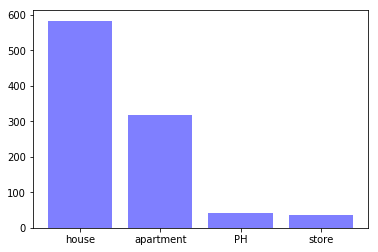

Bs.As. G.B.A. Zona Norte        333
Bs.As. G.B.A. Zona Oeste        174
Buenos Aires Costa Atlántica    148
Capital Federal                  94
Bs.As. G.B.A. Zona Sur           75
Córdoba                          62
Santa Fe                         50
Buenos Aires Interior            18
Misiones                          7
San Luis                          4
Chaco                             4
Mendoza                           4
Corrientes                        1
Salta                             1
Río Negro                         1
Entre Ríos                        1
Name: state_name, dtype: int64


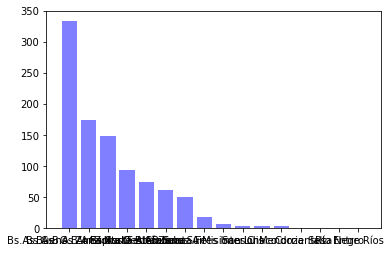

In [114]:
#En categories colocar la lista de columnas a evaluar


categories = ['property_type', 'state_name']

for category in categories:
    print(dfspm2[category].value_counts())
    plt.bar(dfspm2[category].value_counts().index, dfspm2[category].value_counts().values,color='b',\
            alpha=0.5)
    plt.show()